# Linear models for regression

A linear model is a sum of weighted variables that predicts a target output value given an input data instance.

The model has parameters/coefficients.

<img src="resources/linear_model.png" width = "400">

A widely used method for estimating w and b for linear regression problems is called **least-squares linear regression**. This method minimizes what is called the **means squared error** of the model. The mean squared error of the model is  essentially the sum of the squared differences between the predicted target value and the actual target value for all the points in the training set.

The technique of least-squares is designed to find the slope (w) and intercept (b) that minimize this mean squared error. Hence, result is always going to be a straight line.

Linear models can be very effective for data with many features, and generalize well well to new data beyond the training set.

The learning algorithm finds the parameters that optimize an objective function, tipically to minimize some kind of loss function of the predicted targe valeus vs actual target values.

Linear models make strong assumptions about the structure of the data (the target value can be predicted using a weighted sum of the input variables). They give stable but potentially inaccurate predictions.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

In [9]:
# Datasets
from sklearn.datasets import make_regression, make_friedman1, make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

## Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

# Model selection and training
linreg = LinearRegression().fit(X_train, y_train)

# Results
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


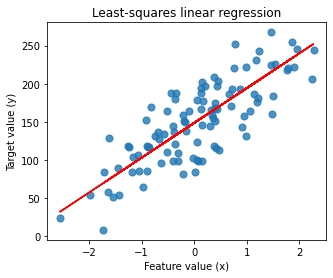

In [7]:
# Matplotlib figure
plt.figure(figsize=(5,4))
# Training data plot
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
# Linear regression plot
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')

# Title and labels
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

# Model selection and training
linreg = LinearRegression().fit(X_train, y_train)

# Results
print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725979102
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482726e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

# Ridge Regression

- It uses the same least-squares method but **adds a penalty for large variations in w parameters**.
- Prediction formula is the same as ordinary least-squares
- The addition of a parameter penalt is called **regularization**. This prevents overfitting by restricting the model, tipically to reduce its complexity.
- Ridge regression uses L2 regularization: minimize sum of squares of w entries.
- Regularization influence is controlled by **alpha**. The higher the value, the more regularization and simpler methods.

<img src="resources/ridge_regression.png" width = "400">

### What is ridge regression doing?
It's regularizing the linear regression by imposing that sum of squares penalty on the size of the W coefficients. So the effect of increasing alpha is to shrink the AW coefficients toward zero and towards each other. But if the input variables (features) have very different scales, then when this shrinkage happens on the coefficients, input variables with different scales will have different contributions to this L2 penalty, because the L2 penalty is a sum of squares of all the coefficients. So transforming the input features, so they are all on the same scale, means the ridge penalty is in some sense applied more failry to all features without unduly weighting some more than others, just because of the difference in scales.

In [11]:
from sklearn.linear_model import Ridge

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

# Model selection and training
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

# Results
print('Crime dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846137
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476

In [13]:
# WITH FEATURE NORMALIZATION

scaler = MinMaxScaler()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
random_state = 0)
 
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

# Results
print('Crime dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044153
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

Results improved with feature normalization.

# Lasso Regression

- It uses a slightly different regularisation term called an **L1 penalty**, instead of ridge regression's L2 penalty.
- L1 penalty computes the sum of the absolute values of the W-coefficients, instead of the sum of squares (L2).
- With lasso regression, a subset of the coefficients are forced to be precisely zero (kind of an automatic feature selection).
- This sparse solution where only a subset of the most important features are left with non-zero weights, also makes the model easier to interpret

<img src="resources/lasso_regression.png" width = "400">


### Ridge vs Lasso Regression
- Many small/medium sized effects -> Ridge
- Only a few variables with medium/large effect -> Lasso

In [14]:
from sklearn.linear_model import Lasso

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

# Data scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# Results
print('Crime dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

# Iterate over the list of features and their coefficients
# Sorted by their absolute value
for e in sorted(list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.612061998579
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    

In [15]:
# WITH DIFFERENT ALPHA VALUES

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    # Model selection and training
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    # Scores
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'.format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



The best test scores is obtained for alpha = 3.00

# Polynomial Features

- This is still a linear regression problem: the afeatures are just numbers within a weighted sum, so we can use the same least-squares techniques to estimate the model coefficients.
- This way we can transform a problem into a higher dimensional regression space.
- This is very effective with classification.
- When we add these new polynomial features, we're essentially adding to the model's ability to capture interactions between the different variables by adding them as features to the linear model.
- Polynomial feature expansion with high degree can lead to complex model and hence overfitting. For this reason, polynomial regrssion is often done with a regularized method like ridge regression.

<img src="resources/polynomial_features.png" width = "400">

In [16]:
from sklearn.preprocessing import PolynomialFeatures

### Simple linear regression
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,random_state = 0)
# Model selection and training (linear regression)
linreg = LinearRegression().fit(X_train, y_train)

# Results
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)



In [17]:
### Polynomial linear regression
# Transforming features into polynomial features
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,random_state = 0)
# Model selection and training with polynomial features
linreg = LinearRegression().fit(X_train, y_train)

# Results
print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.



In [18]:
### Polynomial ridge regression
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,random_state = 0)
# Model selection and training
linreg = Ridge().fit(X_train, y_train)

# Results
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


#### Extra Notes
- **Regularisation** is an extremely important concept in machine learning. It's a way to prevent overfitting, and thus, improve the likely generalization performance of a model, by restricting the models possible parameter settings. Usually the effect of this restriction from regularisation, is to reduce the complexity of the final estimated model
- **Feature normalization**: it is important for some machine learning methods that all features are on the same scale:
    - Faster convergence in learning
    - More uniform or fair influence for all weights
    - ...
    - Downside: the results can be harder to interpret
    - Note: regularisation works especially well then we have relatively small amounts of training data compared to the number of features in our model. As the training data increases, the regularization becomes less important.